# Time Series Forecasting w/ ARIMA¶

In [1]:
import warnings
warnings.filterwarnings("ignore")
# Compatibility between Python 2.7 and 3.x
from __future__ import unicode_literals, print_function, division
from io import open
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score
from pandas.plotting import autocorrelation_plot
style.use('fivethirtyeight')
%matplotlib inline
# Custom utility functions shared across notebooks
import utils## Data Loading

## Data Loading

In [2]:
period_len = 174 # Maximum number of months for which data exists
airlines = ['AA', 'DL', 'UA'] # Airlines of interest in forecasting
passengers_df = utils.load_data(airlines, category='Passengers') # Monthly passenger counts
flights_df = utils.load_data(airlines, category='Flights') # Monthly flight counts
asm_df = utils.load_data(airlines, category='ASM') # Monthly available seat miles
rpm_df = utils.load_data(airlines, category='RPM') # Monthly revenue passenger miles

# Fetch complete datasets only / ensure that 174 months of data exist for dataframes in each category
assert passengers_df.shape[1] == flights_df.shape[1] == asm_df.shape[1] == rpm_df.shape[1] == period_len

## Autocorrelation Plots

In [3]:
american_dallas_passengers = passengers_df.loc['AA-DFW']
delta_atlanta_flights = flights_df.loc['DL-ATL']
united_chicago_ASM = asm_df.loc['UA-ORD']

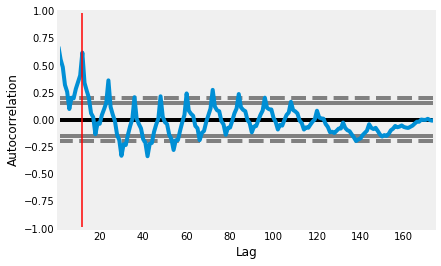

In [4]:
ax = autocorrelation_plot(american_dallas_passengers)
ax.axvline(12, c='r', linewidth=1.5)

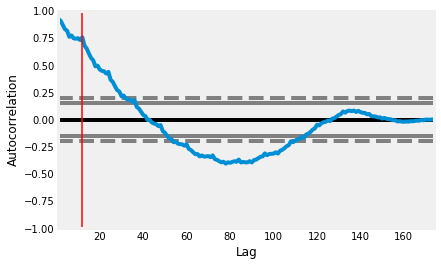

In [5]:
ax = autocorrelation_plot(delta_atlanta_flights)
ax.axvline(12, c='r', linewidth=1.5)

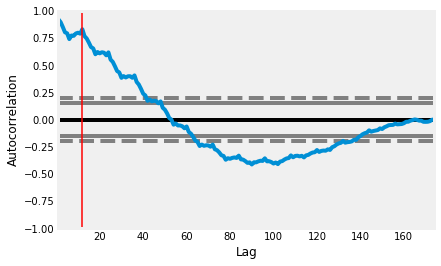

In [6]:
ax = autocorrelation_plot(united_chicago_ASM)
ax.axvline(12, c='r', linewidth=1.5)

## ARIMA Model Definition

In [9]:
DATES = pd.date_range(start='2016-04-01', end='2017-03-31', freq='M').to_pydatetime()

def test_series(df, airline, airport, output_seq_len, order=(12,1,2)):
    """
    Tests ARIMA model on a specific airline-airport series, visually comparing
    actual values to forecasted values and displaying MAPE score.
    
    @df: DataFrame to draw specific time series from (Passengers, Flights, ASM, RPM)
    @airline: IATA airline code (AA, DL, UA, etc.)
    @airport: IATA airport code (ATL, DFW, ORD, etc.)
    @output_seq_len: How many months to set aside for prediction (test targets)
    """
    
    df = df.astype(np.float32)
    series = df.loc[airline + '-' + airport].values
    train, test = series[:-output_seq_len], series[-output_seq_len:]
    differenced = utils.remove_seasonality(train, lag=output_seq_len).values
    model = ARIMA(differenced, order=order)
    model_fit = model.fit(disp=0)
    forecast = model_fit.forecast(12)[0]
    history = [x for x in train]
    for pred in forecast:
        reverted = utils.add_seasonality(history, pred, lag=output_seq_len)
        history.append(reverted)
    preds = np.array(history[-output_seq_len:])
    
    MAPE_score = utils.MAPE(test, preds)
    
    label_0 = "Past (training) Values"
    label_1 = "Future (target) Values"
    label_2 = "Future (predicted) values"
    title = "ARIMA // {0}-{1}: Monthly {2} (MAPE = {3}%)".format(airline, airport, df.index.name, MAPE_score)
    
    plt.figure(figsize=(20, 8))
    plt.plot(DATES, test, '*--', c='#8b0000', label=label_1, ms=20)
    plt.plot(DATES, preds, '^--', c='#000080', label=label_2, ms=20)
    plt.xlabel("Date (YYYY-MM)")
    plt.ylabel("Monthly {}".format(df.index.name))
    plt.legend(loc='best', fontsize=20)
    plt.title(title, fontsize=20)
    plt.setp(plt.xticks()[1], rotation=45, fontsize=14)
    plt.savefig('arima-test_series-{}-{}'.format(airline, airport))
    plt.show()

## Passengers Modeling & Forecasting

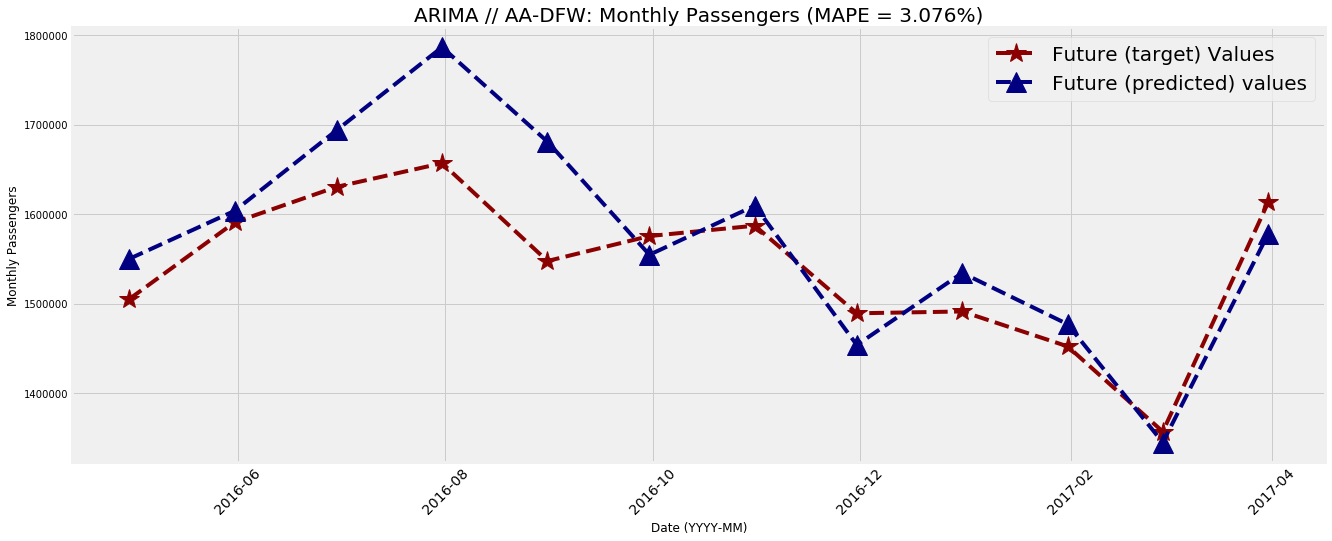

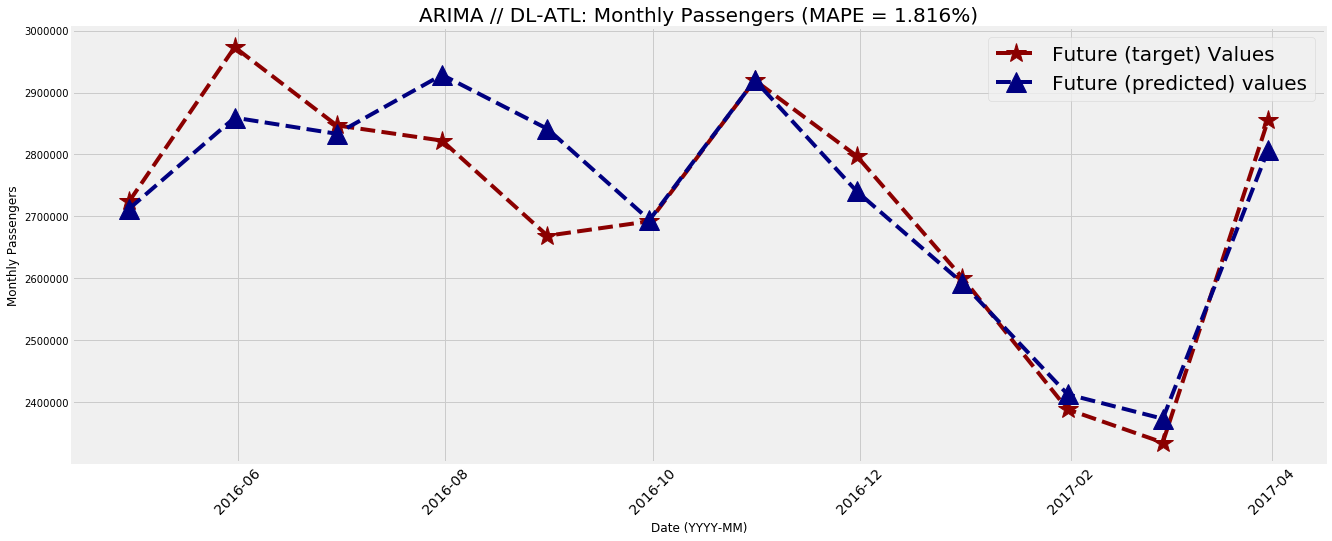

/Users/BennyBluebird/anaconda/envs/tfpy27/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


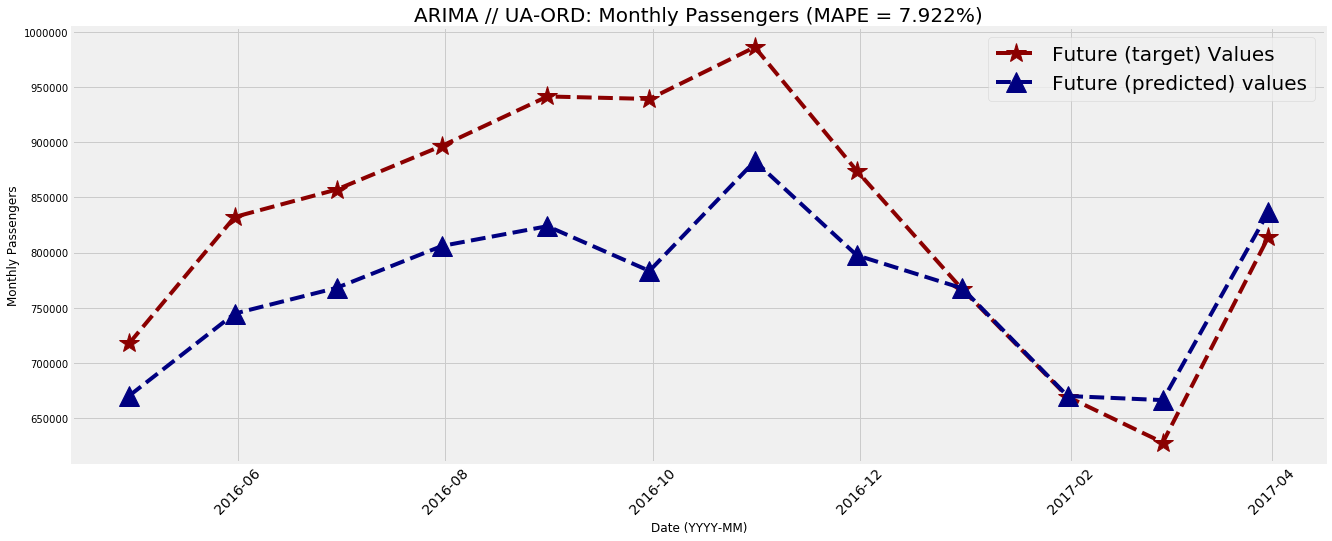

In [8]:
# Display passengers forecasts and MAPE scores for three key combinationss
airline_airports = [('AA', 'DFW'), ('DL', 'ATL'), ('UA', 'ORD')]
for combo in airline_airports:
    airline, airport = combo
    test_series(df=passengers_df, airline=airline, airport=airport, output_seq_len=12)

## Flights Modeling & Forecasting

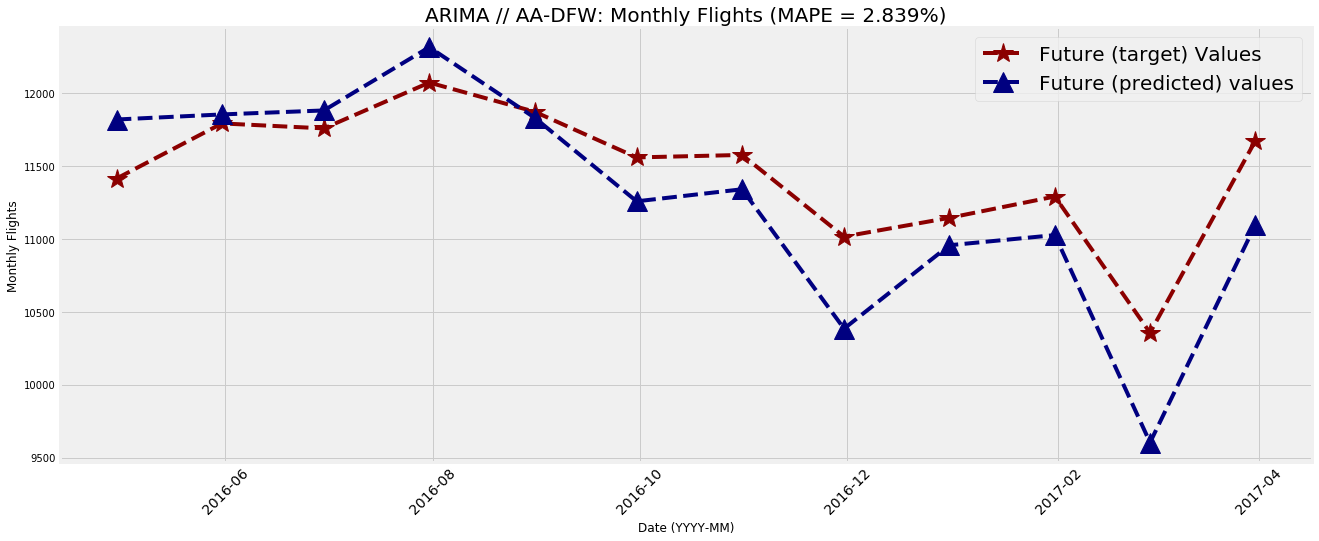

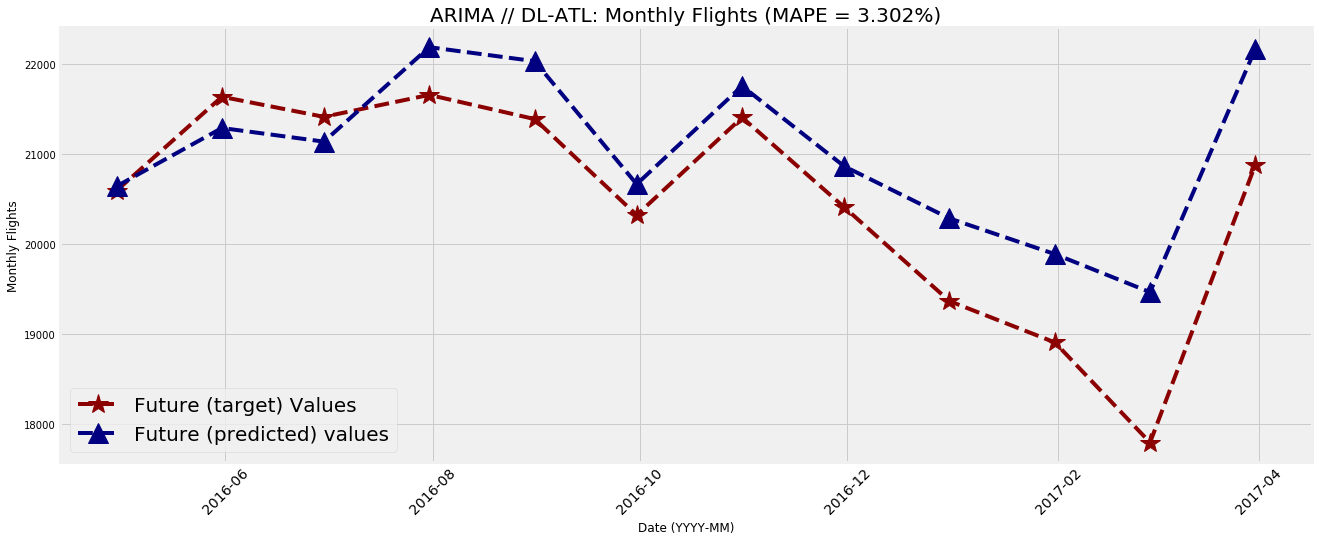

/Users/BennyBluebird/anaconda/envs/tfpy27/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


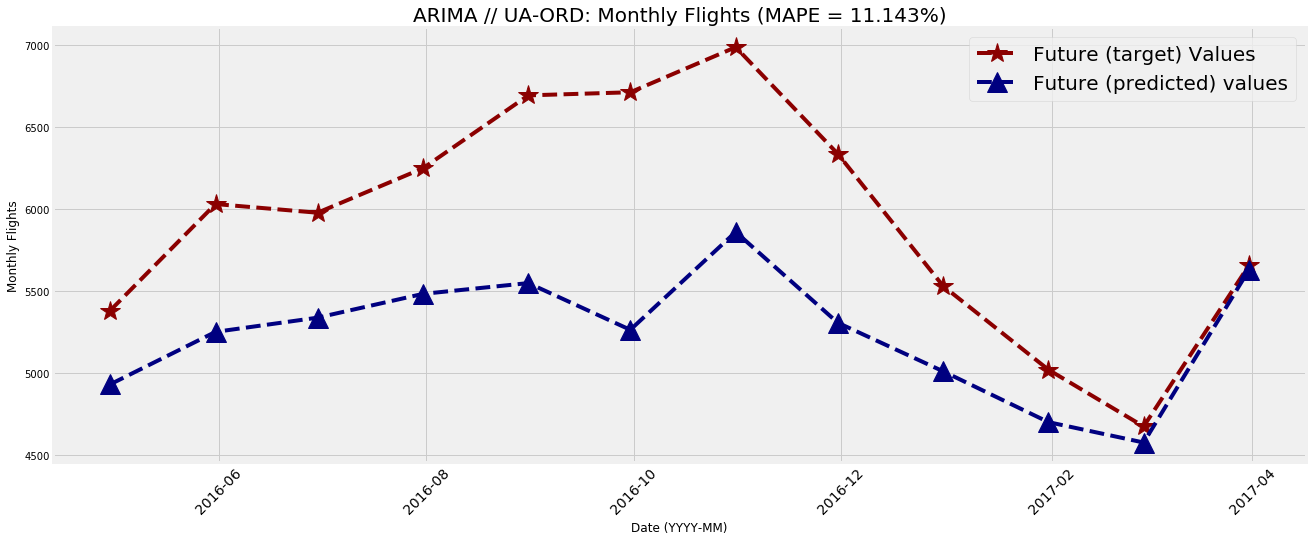

In [80]:
# Display ## Available Seat Miles (ASM) Modeling & Forecasting## Available Seat Miles (ASM) Modeling & Forecastingflights forecasts and MAPE scores for three key combinations
airline_airports = [('AA', 'DFW'), ('DL', 'ATL'), ('UA', 'ORD')]
for combo in airline_airports:
    airline, airport = combo
    test_series(df=flights_df, airline=airline, airport=airport, output_seq_len=12)

## Available Seat Miles (ASM) Modeling & Forecasting

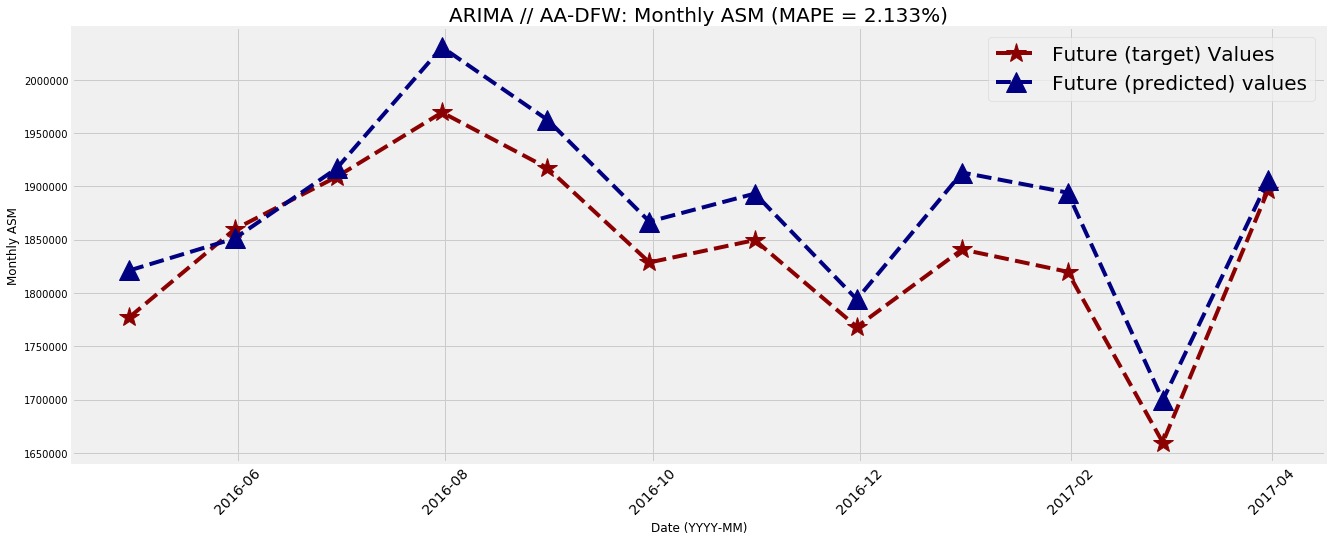

/Users/BennyBluebird/anaconda/envs/tfpy27/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


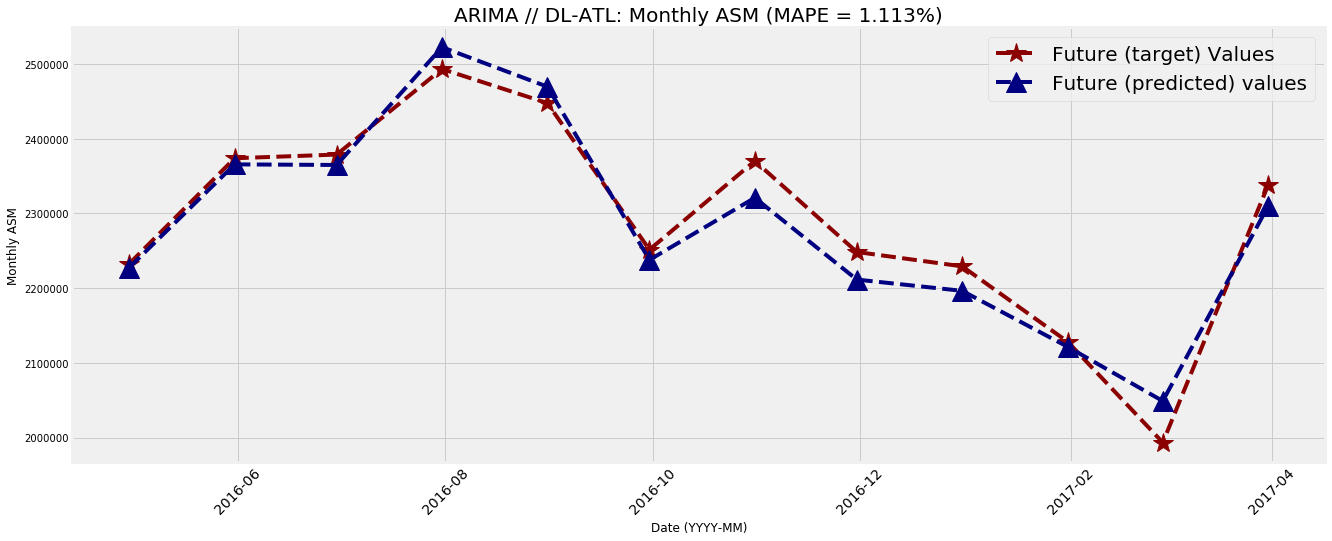

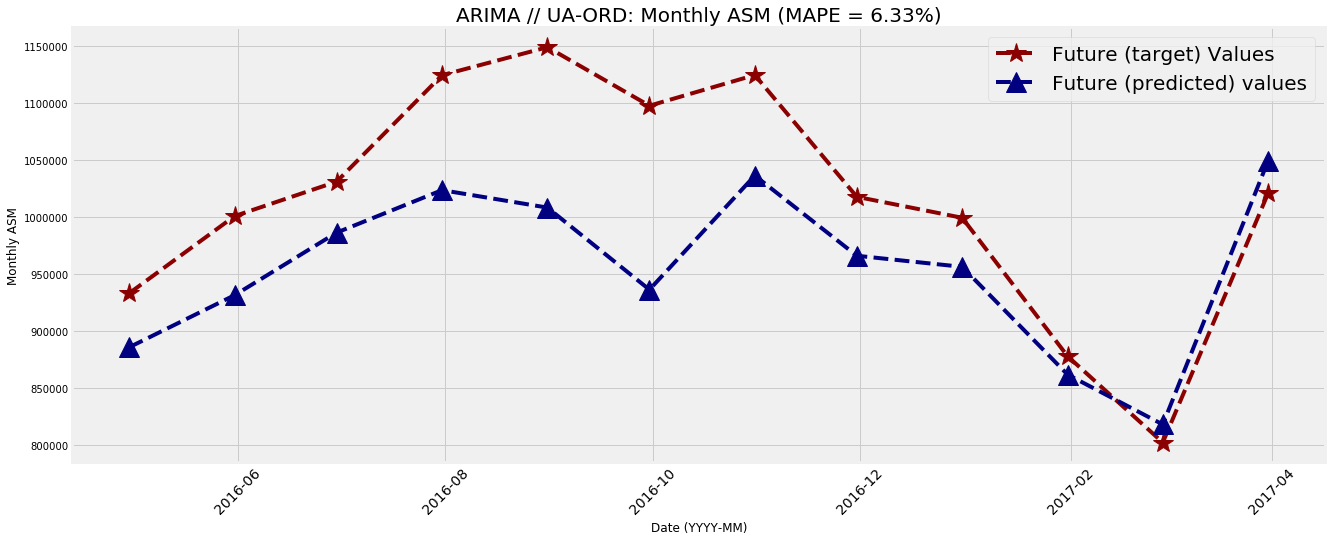

In [10]:
# Display ASM forecasts and MAPE scores for three key combinations
airline_airports = [('AA', 'DFW'), ('DL', 'ATL'), ('UA', 'ORD')]
for combo in airline_airports:
    airline, airport = combo
    test_series(df=asm_df, airline=airline, airport=airport, output_seq_len=12)

## Revenue Passenger Miles (RPM) Modeling & Forecasting

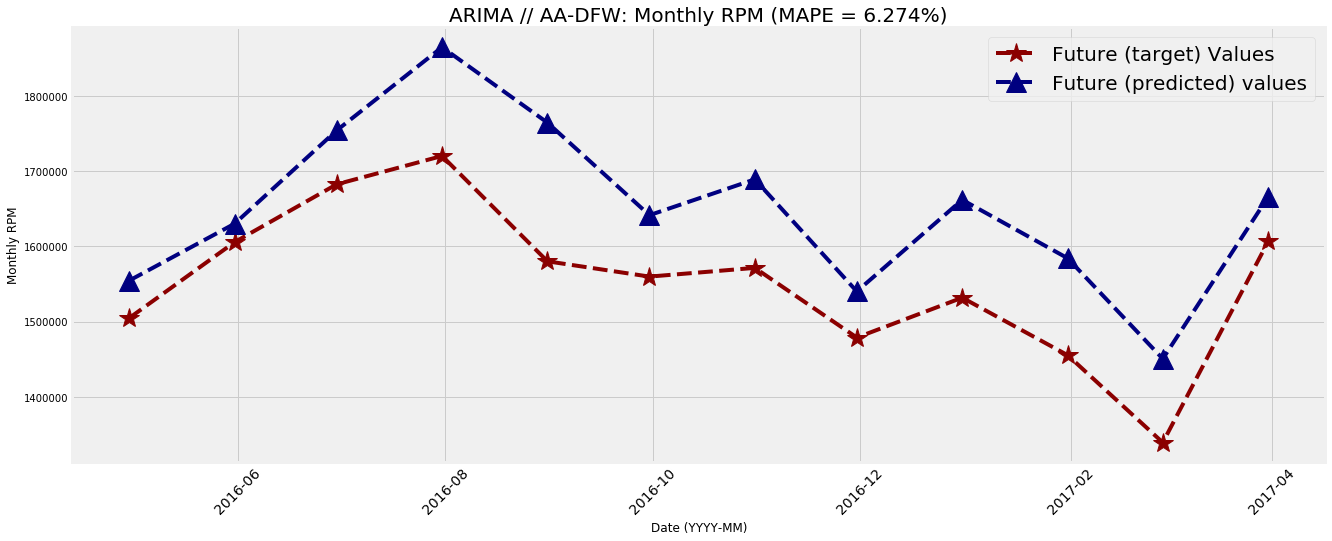

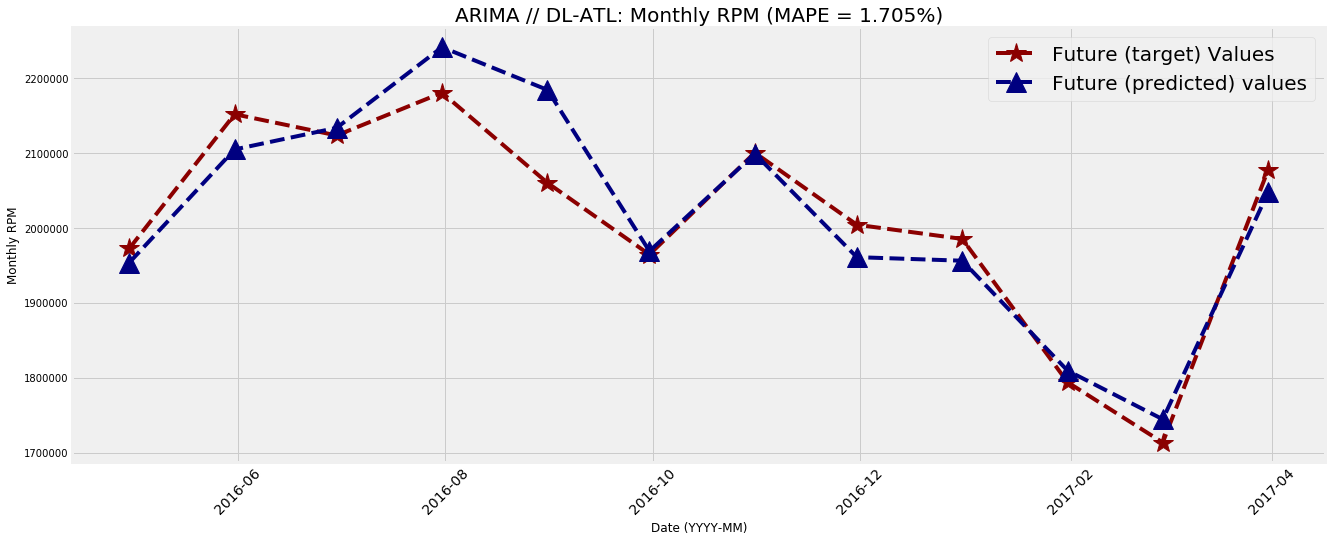

/Users/BennyBluebird/anaconda/envs/tfpy27/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


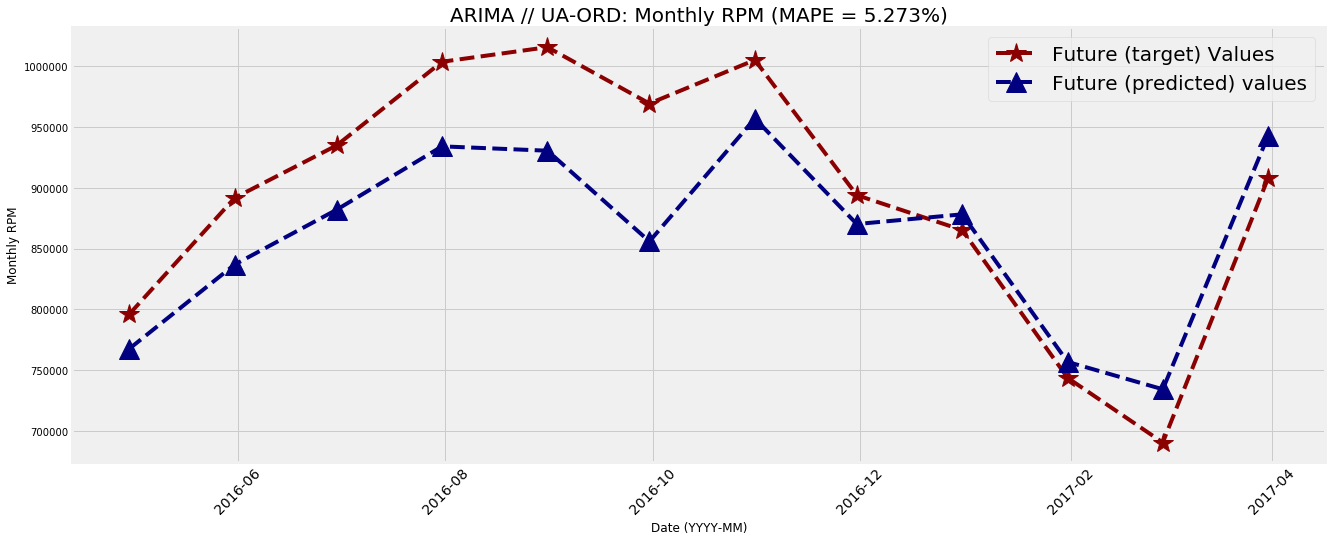

In [82]:
# Display RPM forecasts and MAPE scores for three key combinations
airline_airports = [('AA', 'DFW'), ('DL', 'ATL'), ('UA', 'ORD')]
for combo in airline_airports:
    airline, airport = combo
    test_series(df=rpm_df, airline=airline, airport=airport, output_seq_len=12)